<a href="https://colab.research.google.com/github/tnotstar/machine-learning-zoomcamp/blob/master/cohorts/2025/03-classification/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Zoomcamp (Cohort 2025) #

## Chapter 03. Machine Learning for Classification ##

### Homework (Submitted at 2025-10-15) ###

#### Initialization and loading libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Dataset

In this homework, we will use the lead scoring dataset **Bank Marketing** dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with wget:

In [2]:
!wget -N 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

--2025-10-15 22:15:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.01s   

Last-modified header missing -- time-stamps turned off.
2025-10-15 22:15:05 (5.59 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



Loading and inspecting data

In [3]:
df = pd.read_csv("course_lead_scoring.csv")
print(f"Length of the dataset: {len(df)}")

Length of the dataset: 1462


In [4]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1281.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108,0.619015
std,1.449717,15070.140389,1.681564,0.288465,0.485795
min,0.000000,13929.000000,0.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500,0.000000
50%,2.000000,60148.000000,3.000000,0.510000,1.000000
75%,3.000000,69639.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


#### Data preparation

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

In [6]:
target_variable = "converted"

categorical_features = df.select_dtypes(include='object').columns
if target_variable in categorical_features:
  categorical_features = categorical_features.drop(target_variable)
print(f"Categorical features: {sorted(categorical_features.tolist())}")

numerical_features = df.select_dtypes(include=np.number).columns
if target_variable in numerical_features:
  numerical_features = numerical_features.drop(target_variable)
print(f"Numerical features: {sorted(numerical_features.tolist())}")

Categorical features: ['employment_status', 'industry', 'lead_source', 'location']
Numerical features: ['annual_income', 'interaction_count', 'lead_score', 'number_of_courses_viewed']


In [7]:
feature_display_names = {
    "employment_status": "Employment Status",
    "industry": "Industry",
    "lead_source": "Lead Source",
    "location": "Location",
    "annual_income": "Annual Income",
    "interaction_count": "Interaction Count",
    "lead_score": "Lead Score",
    "number_of_courses_viewed": "Number of Courses Viewed",
}

Check if the missing values are presented in the features.

In [8]:
for column in df.columns:
  missing_values = df[column].isnull().sum()
  if missing_values > 0:
    print(f"Missing values from column '{column}': {missing_values}")

Missing values from column 'lead_source': 128
Missing values from column 'industry': 134
Missing values from column 'annual_income': 181
Missing values from column 'employment_status': 100
Missing values from column 'location': 63


If there are missing values:

* For caterogiral features, replace them with 'NA'
* For numerical features, replace with with 0.0

In [9]:
df["lead_source"]       = df["lead_source"].fillna("NA")
df["industry"]          = df["industry"].fillna("NA")
df["annual_income"]     = df["annual_income"].fillna(0.0)
df["employment_status"] = df["employment_status"].fillna("NA")
df["location"]          = df["location"].fillna("NA")

In [10]:
df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


#### Question 1

What is the most frequent observation (mode) for the column industry?

* NA
* technology
* healthcare
* retail


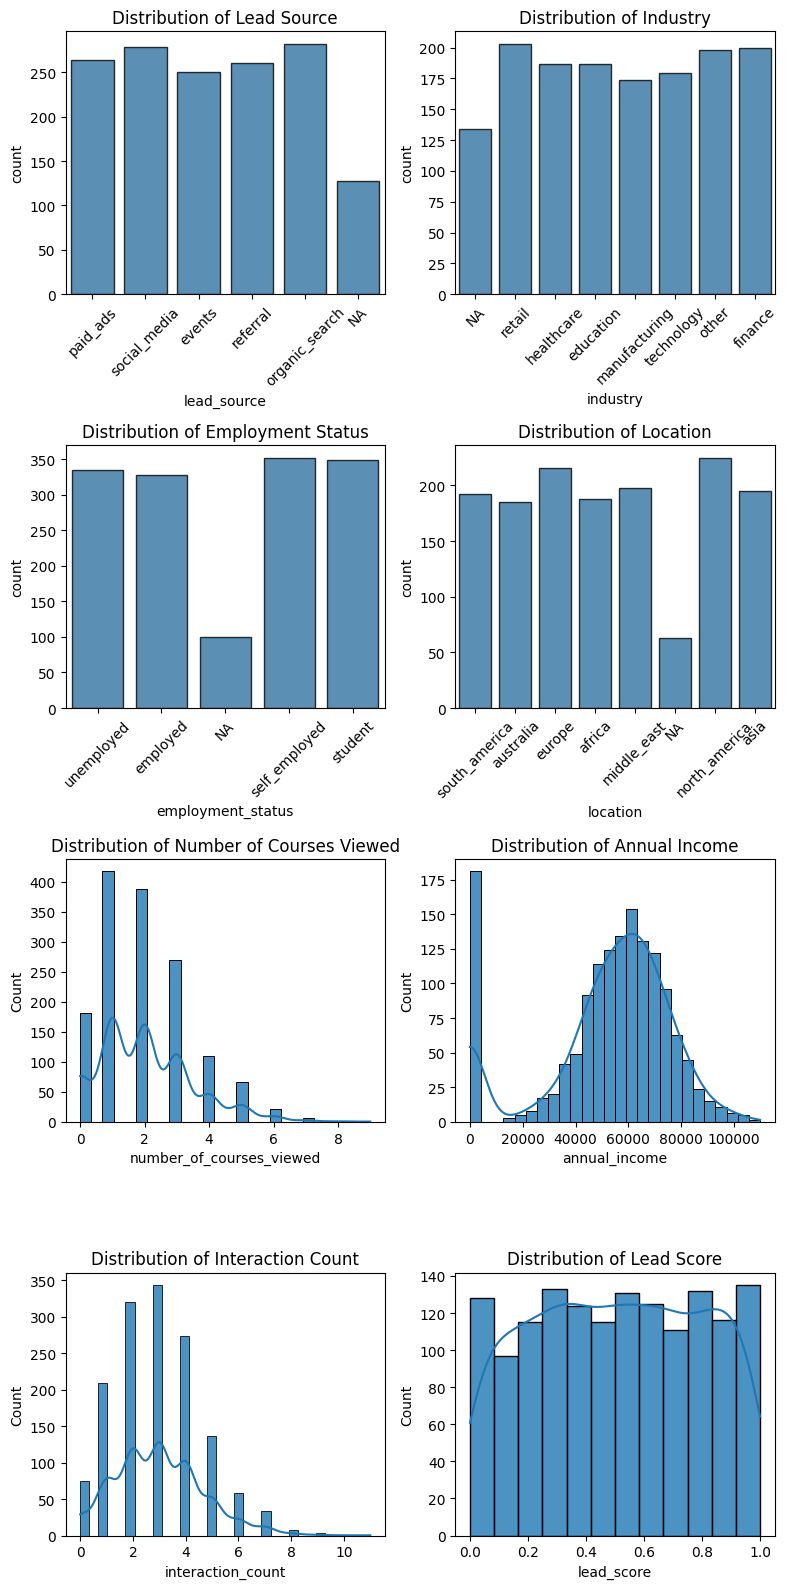

In [11]:
# Determine the number of rows and columns for the subplots
n_categorical = len(categorical_features)
n_numerical = len(numerical_features)
n_cols = 2
n_rows = (n_categorical + n_numerical + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

# Plot categorical features
for i, col in enumerate(categorical_features):
    display_name = feature_display_names.get(col, col)
    sns.countplot(data=df, x=col, ax=axes[i], alpha=0.8, edgecolor='black')
    axes[i].set_title(f'Distribution of {display_name}')
    axes[i].tick_params(axis='x', rotation=45)

# Plot numerical features
for i, col in enumerate(numerical_features):
    display_name = feature_display_names.get(col, col)
    sns.histplot(data=df, x=col, ax=axes[n_categorical + i], kde=True, alpha=0.8)
    axes[n_categorical + i].set_title(f'Distribution of {display_name}')


# Hide any unused subplots
for j in range(n_categorical + n_numerical, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Now we calculate the mode:

In [12]:
for column in df.columns:
  the_mode = df[column].mode()
  print(f"Mode for column '{column}': {the_mode[0]}")

Mode for column 'lead_source': organic_search
Mode for column 'industry': retail
Mode for column 'number_of_courses_viewed': 1
Mode for column 'annual_income': 0.0
Mode for column 'employment_status': self_employed
Mode for column 'location': north_america
Mode for column 'interaction_count': 3
Mode for column 'lead_score': 0.6
Mode for column 'converted': 1


> **Answer 1**: So the `industry` mode is: `retail`

#### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

* `interaction_count` and `lead_score`
* `number_of_courses_viewed` and `lead_score`
* `number_of_courses_viewed` and `interaction_count`
* `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

In [13]:
correlation_matrix = df[numerical_features].corr()
display(correlation_matrix)

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


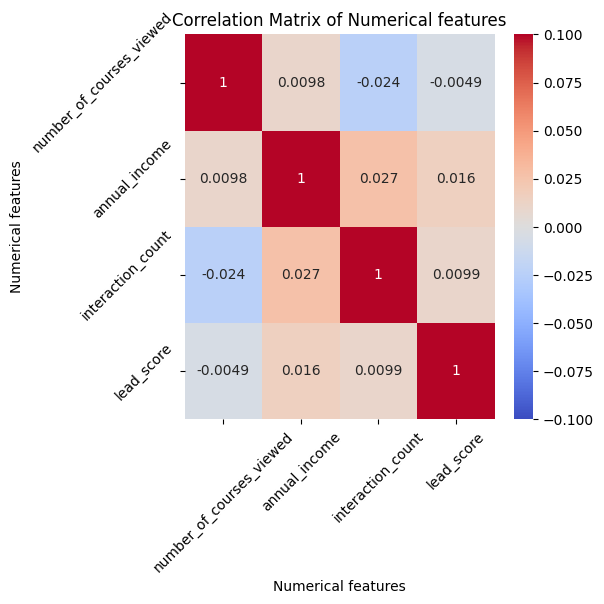

In [14]:
fig, axes = plt.subplots(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-0.1, vmax=0.1, ax=axes)

axes.set_xlabel('Numerical features')
axes.set_ylabel('Numerical features')
axes.set_title('Correlation Matrix of Numerical features')
axes.tick_params(axis='x', rotation=45)
axes.tick_params(axis='y', rotation=45)

plt.show()

In [15]:
# Remove the diagonal and lower triangle of the correlation matrix to avoid duplicate pairs
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
correlation_matrix_upper = correlation_matrix.where(upper_triangle)

# Find the pair with the highest absolute correlation
max_correlation_pair = correlation_matrix_upper.stack().idxmax()
max_correlation_value = correlation_matrix_upper.stack().max()

print(f"The pair of features with the highest correlation is: {max_correlation_pair} with a correlation of {max_correlation_value:.4f}")

The pair of features with the highest correlation is: ('annual_income', 'interaction_count') with a correlation of 0.0270


> **Answer 2**: ('annual_income', 'interaction_count') with a correlation of 0.0270

#### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.

* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

* Make sure that the target value y is not in your dataframe.

In [16]:
from sklearn.model_selection import train_test_split

common_random_state = 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=common_random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=common_random_state)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(f"Length of the train dataset: {len(df_train)}")
print(f"Length of the validation dataset: {len(df_val)}")
print(f"Length of the test dataset: {len(df_test)}")

def split_y_X(df, y_name):
  y = df[y_name]
  X = df.drop(columns=[y_name])
  return y, X

common_y_name = "converted"

y_train, X_train = split_y_X(df_train, common_y_name)
y_val, X_val = split_y_X(df_val, common_y_name)
y_test, X_test = split_y_X(df_test, common_y_name)


Length of the train dataset: 876
Length of the validation dataset: 293
Length of the test dataset: 293


#### Question 3

Calculate the mutual information score between $y$ and other categorical variables in the dataset. Use the training set only. Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

* industry
* location
* lead_source
* employment_status

In [17]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return round(mutual_info_score(series, df_train[target_variable]),2)

df_mi = df_train[categorical_features].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi)


,MI
lead_source,0.04
industry,0.01
employment_status,0.01
location,0.00


> **Answer 3**: Maximum correlation is `lead_source` with value $0.04$ (rounded)

Another approach could be calculate correlation of numerical features with target variable $y$:

In [18]:
df_train[numerical_features].corrwith(df_train[target_variable]).to_frame('correlation')

,correlation
number_of_courses_viewed,0.426480
annual_income,0.016605
interaction_count,0.369941
lead_score,0.219223


Or calculating the mean value of each numerical feature grouped by each target level:

In [19]:
df_train.groupby(by=target_variable)[numerical_features].mean()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
converted,,,,
0,1.215805,51679.577508,2.139818,0.428936
1,2.502742,52505.749543,3.424132,0.558007


#### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset.
* Include them using one-hot encoding.
  * Fit the model on the training dataset.
  * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

* 0.64
* 0.74
* 0.84
* 0.94

In [20]:
from sklearn.feature_extraction import DictVectorizer

all_features = categorical_features.append(numerical_features)
train_dict = df_train[all_features].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_train.shape

(876, 31)

In [21]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [23]:
val_dict = df_val[all_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [24]:
conversion_decision = (y_pred > 0.5)
(y_val == conversion_decision).mean()

df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = conversion_decision.astype(int)
df_pred["actual"] = y_val
df_pred["correct"] = (df_pred["prediction"] == df_pred["actual"]).astype(int)

display(df_pred)

,probability,prediction,actual,correct
0,0.611922,1,0,0
1,0.799826,1,1,1
2,0.530213,1,0,0
3,0.471315,0,0,1
4,0.570661,1,0,0
...,...,...,...,...
288,0.419342,0,0,1
289,0.710539,1,1,1
290,0.418185,0,0,1
291,0.744835,1,1,1


In [25]:
global_accuracy = df_pred.correct.mean().round(2)
global_accuracy

np.float64(0.7)

> **Answer 4**: Most close to the given options is $0.74$

#### Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

* `industry`
* `employment_status`
* `lead_score`

> Note: The difference doesn't have to be positive.

In [26]:
all_features = categorical_features.append(numerical_features)
for feature in all_features:
  print(f"Feature: {feature}", end="")
  selected_features = list(set(all_features) - {feature})
  train_dict = df_train[selected_features].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  dv.fit(train_dict)

  X_train = dv.transform(train_dict)

  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
  model.fit(X_train, y_train)

  val_dict = df_val[selected_features].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  y_pred = model.predict_proba(X_val)[:, 1]

  conversion_decision = (y_pred > 0.5)
  (y_val == conversion_decision).mean()

  df_pred = pd.DataFrame()
  df_pred["probability"] = y_pred
  df_pred["prediction"] = conversion_decision.astype(int)
  df_pred["actual"] = y_val
  df_pred["correct"] = (df_pred["prediction"] == df_pred["actual"]).astype(int)

  feature_accuracy = df_pred.correct.mean()
  print(f", accuracy: {feature_accuracy}, diff: {global_accuracy - feature_accuracy}")

Feature: lead_source, accuracy: 0.7030716723549488, diff: -0.0030716723549488734
Feature: industry, accuracy: 0.6996587030716723, diff: 0.0003412969283276279
Feature: employment_status, accuracy: 0.6962457337883959, diff: 0.003754266211604018
Feature: location, accuracy: 0.7098976109215017, diff: -0.009897610921501765
Feature: number_of_courses_viewed, accuracy: 0.5563139931740614, diff: 0.14368600682593857
Feature: annual_income, accuracy: 0.8532423208191127, diff: -0.1532423208191127
Feature: interaction_count, accuracy: 0.5563139931740614, diff: 0.14368600682593857
Feature: lead_score, accuracy: 0.7064846416382252, diff: -0.006484641638225264


#### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

* 0.01
* 0.1
* 1
* 10
* 100

> Note: If there are multiple options, select the smallest C.


In [27]:
train_dict = df_train[all_features].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

all_cs = [0.01, 0.1, 1, 10, 100]
for c in all_cs:
  print(f"C: {c}", end="")
  model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
  model.fit(X_train, y_train)

  val_dict = df_val[all_features].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  y_pred = model.predict_proba(X_val)[:, 1]

  conversion_decision = (y_pred > 0.5)
  (y_val == conversion_decision).mean()

  df_pred = pd.DataFrame()
  df_pred["probability"] = y_pred
  df_pred["prediction"] = conversion_decision.astype(int)
  df_pred["actual"] = y_val
  df_pred["correct"] = (df_pred["prediction"] == df_pred["actual"]).astype(int)

  print(f", accuracy: {df_pred.correct.mean()}")

C: 0.01, accuracy: 0.6996587030716723
C: 0.1, accuracy: 0.6996587030716723
C: 1, accuracy: 0.6996587030716723
C: 10, accuracy: 0.6996587030716723
C: 100, accuracy: 0.6996587030716723


> **Answer 5**: $C > 0.1$


Submit the results
Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw03
If your answer doesn't match options exactly, select the closest one